# Statistics collection report (ACM)

We have put a camera in ACM's office and I was able to collect around 24000 images in three days. One image with the resolution of 1280x720 was collected every 5 seconds.

2016-04-22

2016-04-25

2016-04-26

The main goal of this project is to build a system that can remotely fetch images analyze them and report statistics on their content. We focus our analysis on robust detection of faces within the images and determining the gender of these faces. We will compare our results with an available open source face detector. 

From the collected images only, faces where detected in only 1.5% of them.

## Known issues with the analysis :

(a) The position of the camera was not the most ideal position for determining the number of people using the coffee machine. This position was selected since there was the risk of water spilling on the camera if placed lower.

(b) The high lighting contrast made analysis more difficult. A strong source of light was on the right of the camera and this has shed shadow on most of the faces.

(c) The focus of our analysis is building a robust face detector with very low false positives. So we might have missed some faces.

(d) The 5 second time gap between the images has made the task of tracking people in different frames very hard. Although I have some good ideas on how to address this problem, I have left this out of this project. This decision was made due to time and budget constraints. 


This document is made in an Jupyter python notebook, Please ignore the pieces of code that appear in it. Also, let me know what other analysis you would like to see.

In [1]:
%matplotlib inline
from matplotlib import pyplot as pp
import numpy as np
import cv2
import ACM_analytics
import pickle
import os
from detector import vision_tools
from common import cosmetics
from analytics import time_tools

def imshow( im ):
    fig = pp.figure( figsize=(13,13) )
    pp.imshow( im[:,:,::-1] )
    
def draw_rects( im, rects, color ):
    for r in rects :
        cv2.rectangle( im, (r[0],r[1]), (r[2],r[3]), color[::-1],2 )

## Analysis of the data collected on 2016-04-22

In [6]:
aa_22 = ACM_analytics.analytics(0)
aa_22.load()

stamps = aa_22.get_dnn_stamps()
dnn_patches = aa_22.get_dnn_patches()

In all cases, we will first look at the collected statistics and then try to verify them by looking at the actual data that the statistics is collected from.

To begin, we look at the frequency of the detections made for the day 2016-04-22.

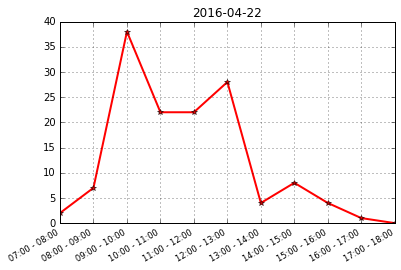

In [7]:
tg = time_tools.time_grid( np.min( aa_22.stamps ), np.max( aa_22.stamps ) )
h,l,t = tg.map( stamps )

pp.plot( range(len(h)),h, 'r*-',linewidth=2 )
pp.xticks(range(len(h)), l, size='small')
pp.title(t)
pp.gcf().autofmt_xdate()
pp.grid()

We can also look at the gender of the people standing infront of the camera on that day. The c

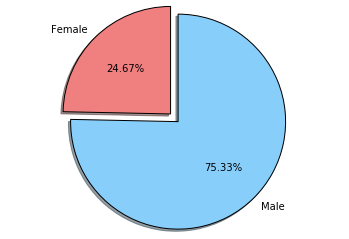

In [9]:
gender_labels = aa_22.estimate_gender( dnn_patches )
glist = [ len( np.where( gender_labels == 0 )[0] ), len( np.where( gender_labels == 1 )[0] ) ]
labels = [ 'Female','Male' ]
explode = (0,0.1)
colors = [ 'lightcoral',  'lightskyblue' ]
pp.pie( glist, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=90 );
pp.axis('equal');

But these numbers are meaning less if we don't have any trust in the Machine Learning that has been utilized in mining for this information. To validate these numbers, we first take a look at the detected faces in our data.

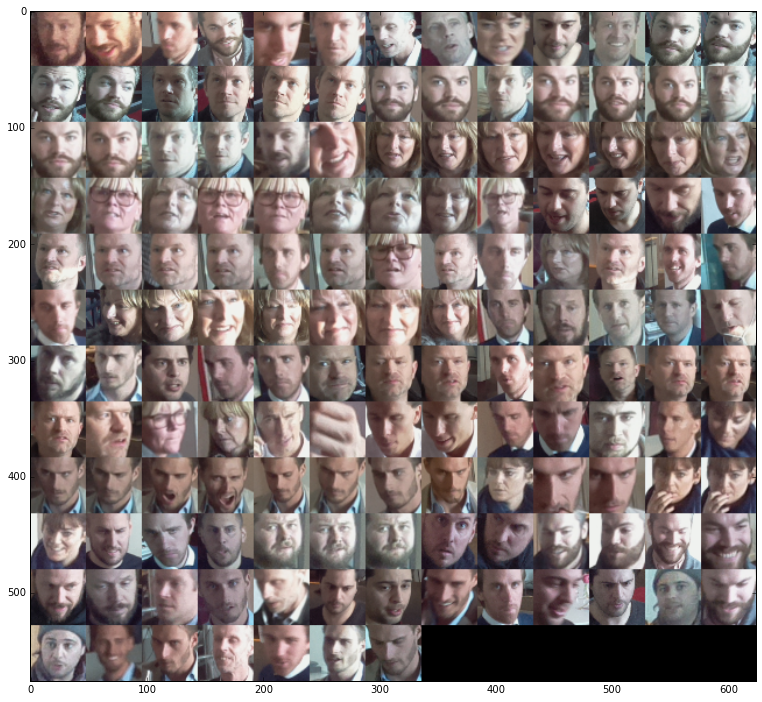

In [10]:
out = cosmetics.patches2image( dnn_patches )
imshow( out )

This model has detected 150 faces in the data and among those only one is false positive. We can apply our gender estimator to this data and see how the gender of each face is determined.

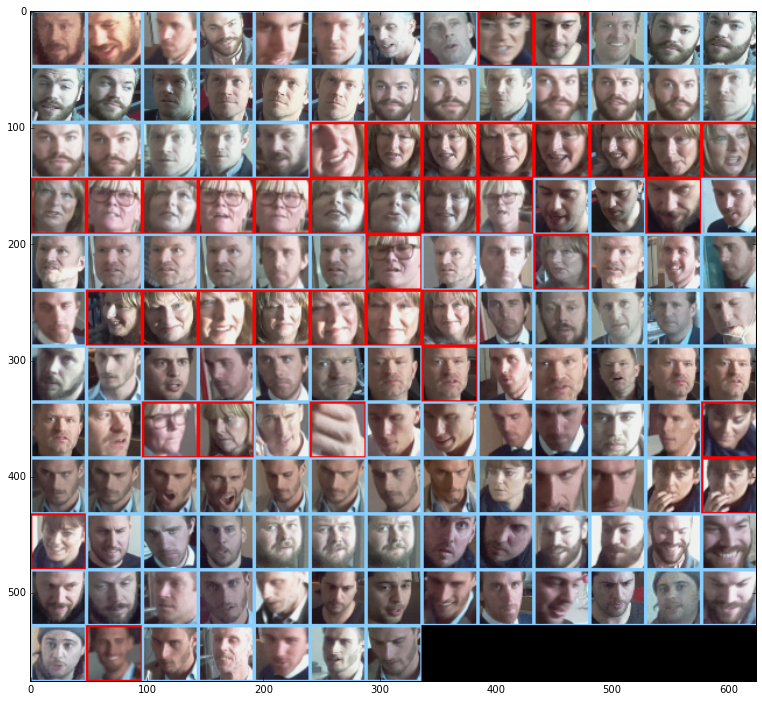

In [11]:
out = cosmetics.patches2image_label( dnn_patches, gender_labels )
imshow( out )

Here, red boxes are the ones that are detected as female and blue ones are the ones detected as male.

Now we will carry on and do the same analysis for the other two days.

## Analysis of the data collected on 2016-04-25

In [17]:
aa_25 = ACM_analytics.analytics(1)
aa_25.load()

stamps = aa_25.get_dnn_stamps()
dnn_patches = aa_25.get_dnn_patches()

Face detection frequency

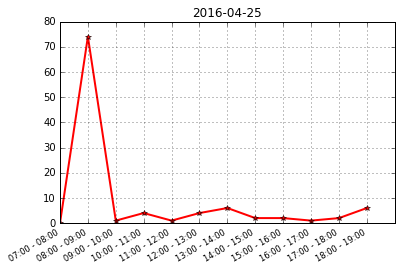

In [18]:
tg = time_tools.time_grid( np.min( aa_25.stamps ), np.max( aa_25.stamps ) )
h,l,t = tg.map( stamps )

pp.plot( range(len(h)),h, 'r*-',linewidth=2 )
pp.xticks(range(len(h)), l, size='small')
pp.title(t)
pp.gcf().autofmt_xdate()
pp.grid()

Gender Estimation 

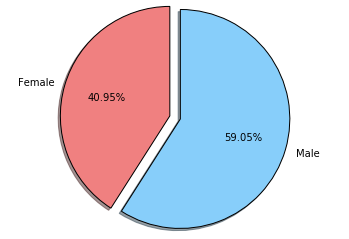

In [19]:
gender_labels = aa_25.estimate_gender( dnn_patches )
glist = [ len( np.where( gender_labels == 0 )[0] ), len( np.where( gender_labels == 1 )[0] ) ]
labels = [ 'Female','Male' ]
explode = (0,0.1)
colors = [ 'lightcoral',  'lightskyblue' ]
pp.pie( glist, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=90 );
pp.axis('equal');

Detected Faces

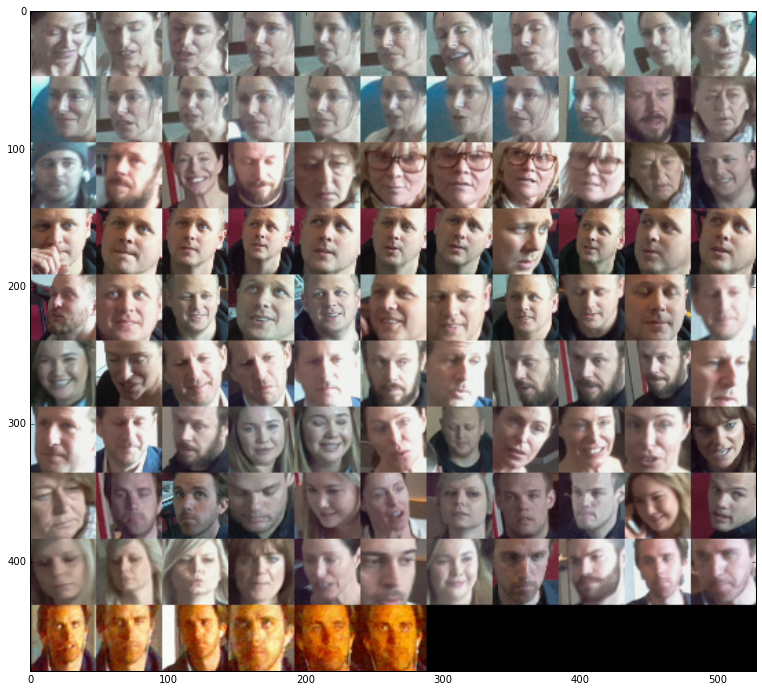

In [22]:
out = cosmetics.patches2image( dnn_patches )
imshow( out )

Gender Detection

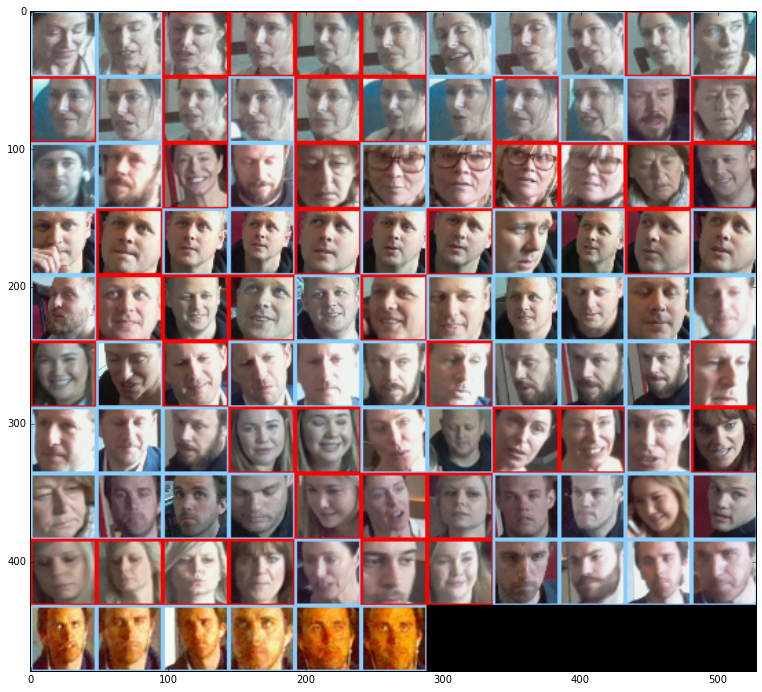

In [23]:
out = cosmetics.patches2image_label( dnn_patches, gender_labels )
imshow( out )

## Analysis of the data collected on 2016-04-26

In [26]:
aa_26 = ACM_analytics.analytics(2)
aa_26.load()

stamps = aa_26.get_dnn_stamps()
dnn_patches = aa_26.get_dnn_patches()

Face detection frequency

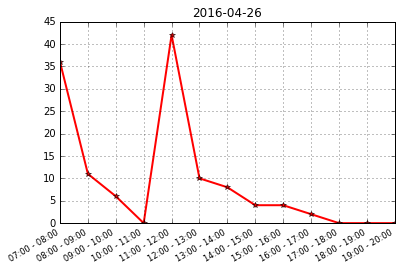

In [27]:
tg = time_tools.time_grid( np.min( aa_26.stamps ), np.max( aa_26.stamps ) )
h,l,t = tg.map( stamps )

pp.plot( range(len(h)),h, 'r*-',linewidth=2 )
pp.xticks(range(len(h)), l, size='small')
pp.title(t)
pp.gcf().autofmt_xdate()
pp.grid()

Gender Estimation

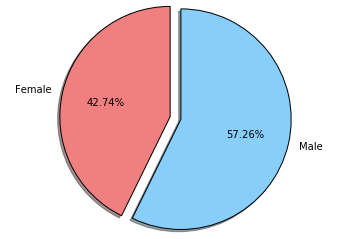

In [28]:
gender_labels = aa_26.estimate_gender( dnn_patches )
glist = [ len( np.where( gender_labels == 0 )[0] ), len( np.where( gender_labels == 1 )[0] ) ]
labels = [ 'Female','Male' ]
explode = (0,0.1)
colors = [ 'lightcoral',  'lightskyblue' ]
pp.pie( glist, explode=explode, labels=labels, colors=colors, autopct='%1.2f%%', shadow=True, startangle=90 );
pp.axis('equal');

Detected Faces

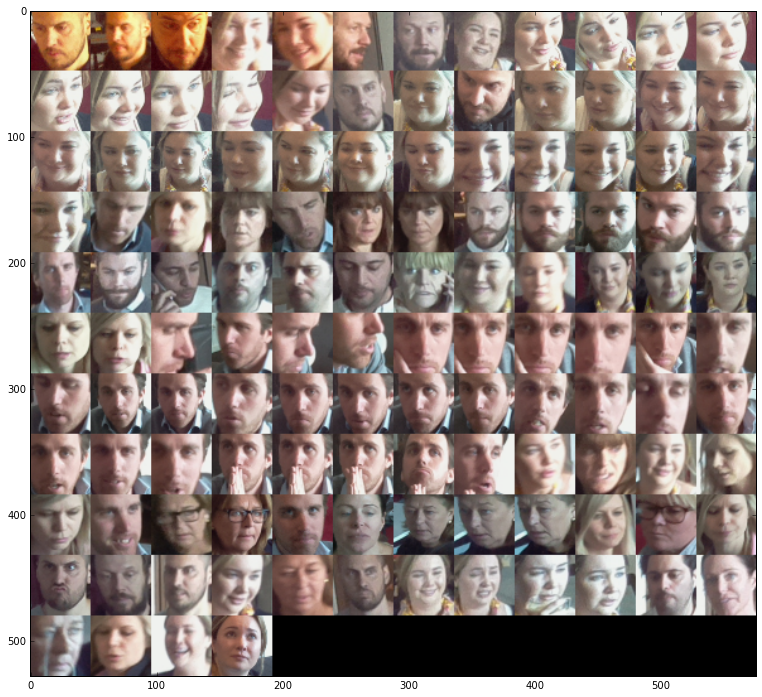

In [29]:
out = cosmetics.patches2image( dnn_patches )
imshow( out )

Gender Detection

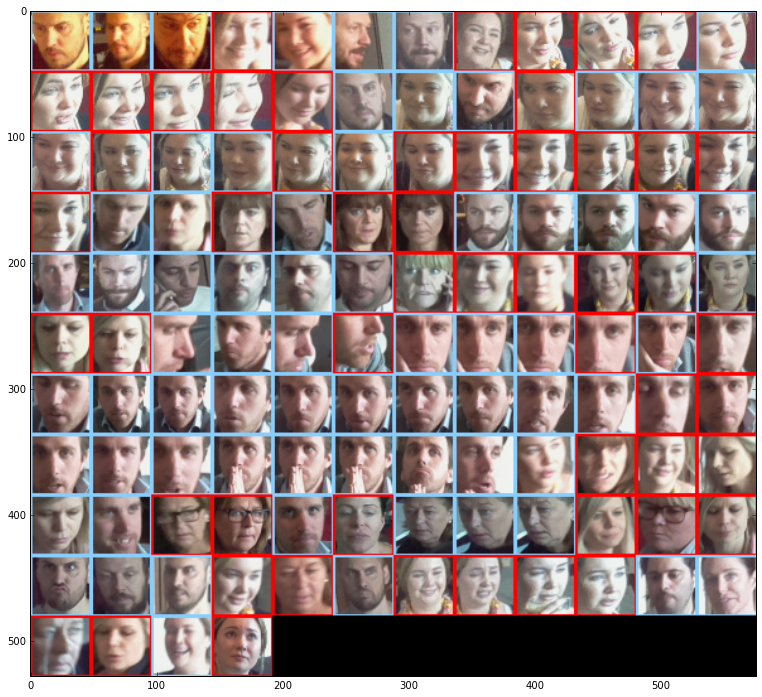

In [30]:
out = cosmetics.patches2image_label( dnn_patches, gender_labels )
imshow( out )

# Comparing with OpenCV

## 2016-04-22

In [35]:
dnn_patches = aa_22.get_dnn_patches()
haar_patches = aa_22.get_haar_patches()

# Our detector

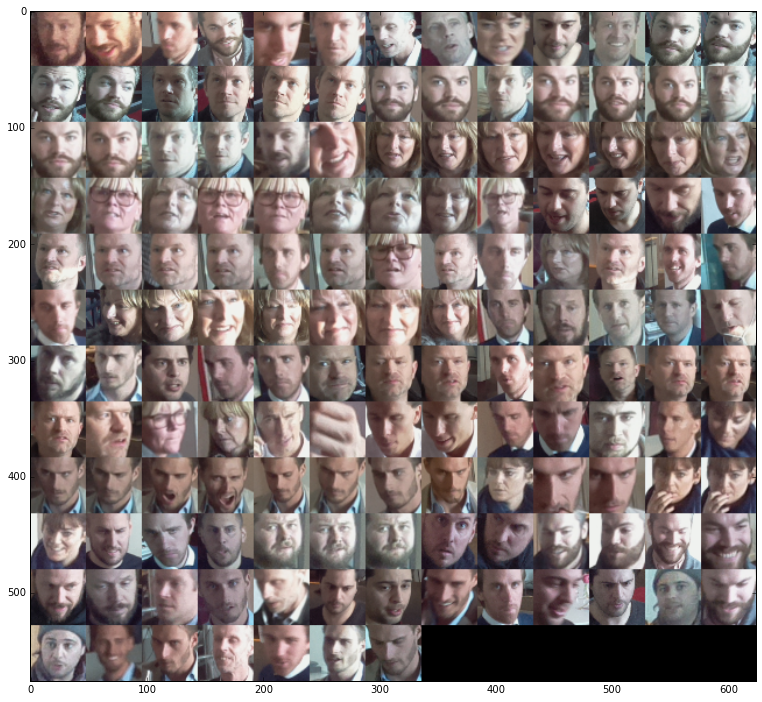

In [33]:
out = cosmetics.patches2image( dnn_patches )
imshow( out )

# OpenCV's detector

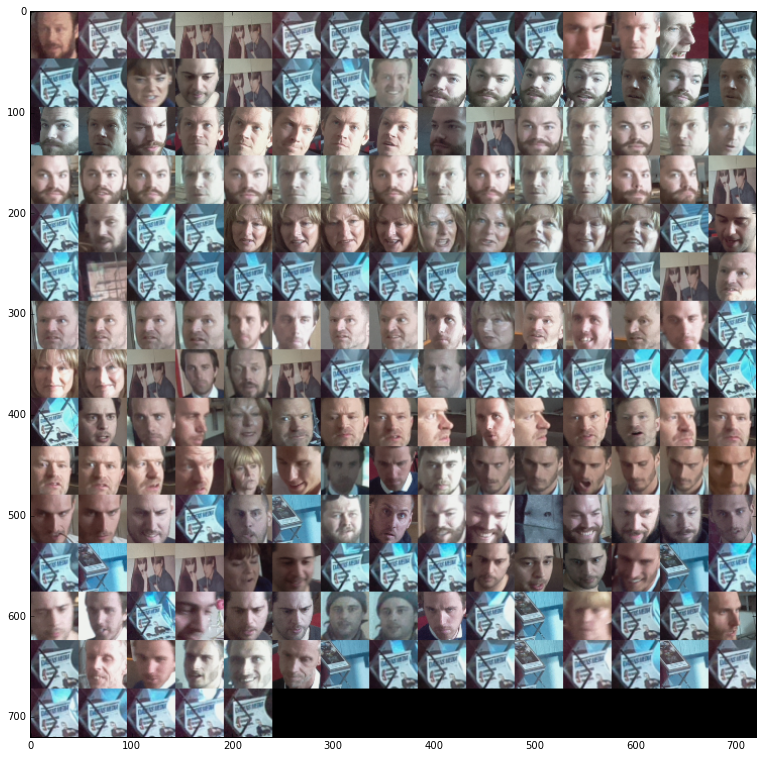

In [36]:
out = cosmetics.patches2image( haar_patches )
imshow( out )